In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.read_csv('GoogleStocks.csv')
dataset = dataset.iloc[1:]
p = ['close', 'volume', 'open', 'high', 'low']
for i in p:
        dataset[i] = dataset[i].replace(',','', regex=True).astype(float)
dataset = dataset.sort_values(by='date')
dataset['Avg'] = (dataset['high']+dataset['low'])/2.0
dataset['date']= pd.to_datetime(dataset['date'])
dataset = dataset[['volume','Avg','open']]
print(dataset.head())
dataset_train,dataset_test = train_test_split(dataset, shuffle=False,test_size=0.2)
# dataset_train = dataset[132:]
# dataset_test = dataset[:132]

trainset = dataset_train.iloc[:,0:2].values
Y = dataset_train.iloc[:,2:3].values
testset = dataset_test.iloc[:,0:2].values
sc = MinMaxScaler(feature_range = (0,1))
training_set = sc.fit_transform(trainset)
test = sc.fit_transform(testset)
Y = sc.fit_transform(Y)

print(training_set.shape)
print(Y.shape)

# test = dataset_test.iloc[:,0:2].values
# #     dataset_total = pd.concat((dataset_train['open'],dataset_test['open']),axis = 0)
# #     inputs = dataset_total[len(dataset_total) - len(dataset_test)-timestep:].values
# #     inputs = inputs.reshape(-1,1)
# inputs = sc.transform(test)
# Yt = sc.transform(real_stock_price)
# inputs.shape
print(test.shape)

        volume      Avg    open
755  1300817.0  735.745  736.79
754  1902254.0  738.005  734.59
753  1782278.0  753.310  750.10
752  1718638.0  745.895  749.25
751  1576240.0  743.670  738.60
(604, 2)
(604, 1)
(151, 2)


<h1>Two Hidden Layers : </h1>

--------------------------------------------------------------------------------------

In [4]:
def No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2):
    X_train = []
    y_train = []
    for i in range(timestep, training_set.shape[0]):
        X_train.append(training_set[i-timestep:i])
        y_train.append(Y[i])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 2))
    print(X_train.shape)
    print(test.shape)
    # MODEL ------------------------------------------------------------------

    regressor = Sequential()
    regressor.add(LSTM(units = hidden1, return_sequences=True, input_shape = (X_train.shape[1], 2))) 
    regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = hidden2, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
#     regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = hidden2)) 
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=16,activation='relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1,activation='relu'))    

    # -------------------------------------------------------------------------
    regressor.compile(optimizer='adam', loss = 'mean_squared_error')   
    regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)
    
    Yt = dataset_test.iloc[timestep:,2:3].values
    real_stock_price = Yt
    Yt = sc.fit_transform(Yt)
    x_test = []
    for i in range(timestep,test.shape[0]):
        x_test.append(test[i-timestep:i])
    x_test = np.array(x_test)
    print(x_test.shape)
    y_test = Yt
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],2))
    print(x_test.shape)
    predicted_price = regressor.predict(x_test)
    predicted_price = sc.inverse_transform(predicted_price)
    predicted_price = predicted_price.astype(np.float64,copy=False)
    print(predicted_price.shape)
    return real_stock_price,predicted_price

# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [5]:
timestep,hidden1,hidden2 = (75,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
529/529 [==============================] - 3s 5ms/step - loss: 0.0777
Epoch 2/50
529/529 [==============================] - 1s 3ms/step - loss: 0.0212
Epoch 3/50
529/529 [==============================] - 1s 3ms/step - loss: 0.0179
Epoch 4/50
529/529 [==============================] - 1s 3ms/step - loss: 0.0160
Epoch 5/50
529/529 [==============================] - 2s 3ms/step - loss: 0.0157
Epoch 6/50
529/529 [==============================] - 2s 3ms/step - loss: 0.0126
Epoch 7/50
529/529 [==============================] - 2s 3ms/step - loss: 0.0122
Epoch 8/50
529/529 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 9/50
529/529 [==============================] - 1s 3ms/step - loss: 0.0117
Epoch 10/50
52

Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


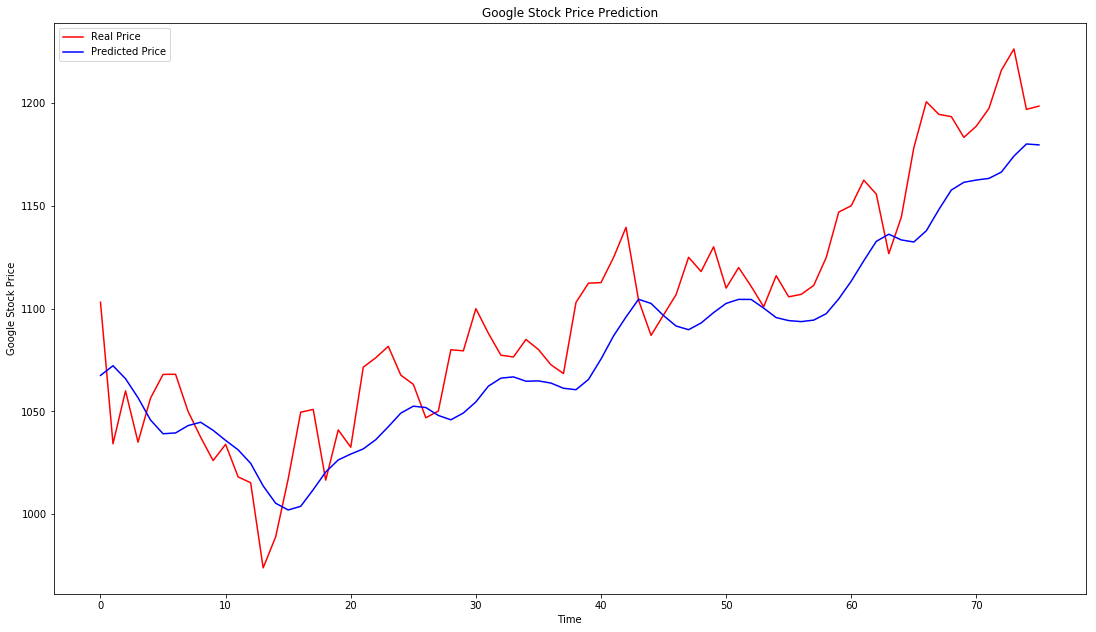

In [7]:

print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
# plt.show()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [8]:
timestep,hidden1,hidden2 = (20,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/100
584/584 [==============================] - 2s 3ms/step - loss: 0.1186
Epoch 2/100
584/584 [==============================] - 0s 654us/step - loss: 0.0314
Epoch 3/100
584/584 [==============================] - 0s 654us/step - loss: 0.0209
Epoch 4/100
584/584 [==============================] - 0s 664us/step - loss: 0.0192
Epoch 5/100
584/584 [==============================] - 0s 645us/step - loss: 0.0186
Epoch 6/100
584/584 [==============================] - 0s 679us/step - loss: 0.0146
Epoch 7/100
584/584 [==============================] - 0s 655us/step - loss: 0.0164
Epoch 8/100
584/584 [==============================] - 0s 653us/step - loss: 0.0175
Epoch 9/100
584/584 [==============================] - 0s 642us/step - loss: 0.0145
Epoch 10/100
584/584 [==============================] - 0s 651us/step - loss: 0.0129
Epoch 11/100
584/584 [==============================] - 0s 658us/step - loss: 0.0113
Epoch 12/100
584/584 [==============================] 

584/584 [==============================] - 0s 649us/step - loss: 0.0044
Epoch 98/100
584/584 [==============================] - 0s 641us/step - loss: 0.0036
Epoch 99/100
584/584 [==============================] - 0s 648us/step - loss: 0.0038
Epoch 100/100
584/584 [==============================] - 0s 656us/step - loss: 0.0039
(131, 20, 2)
(131, 20, 2)
(131, 1)


Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


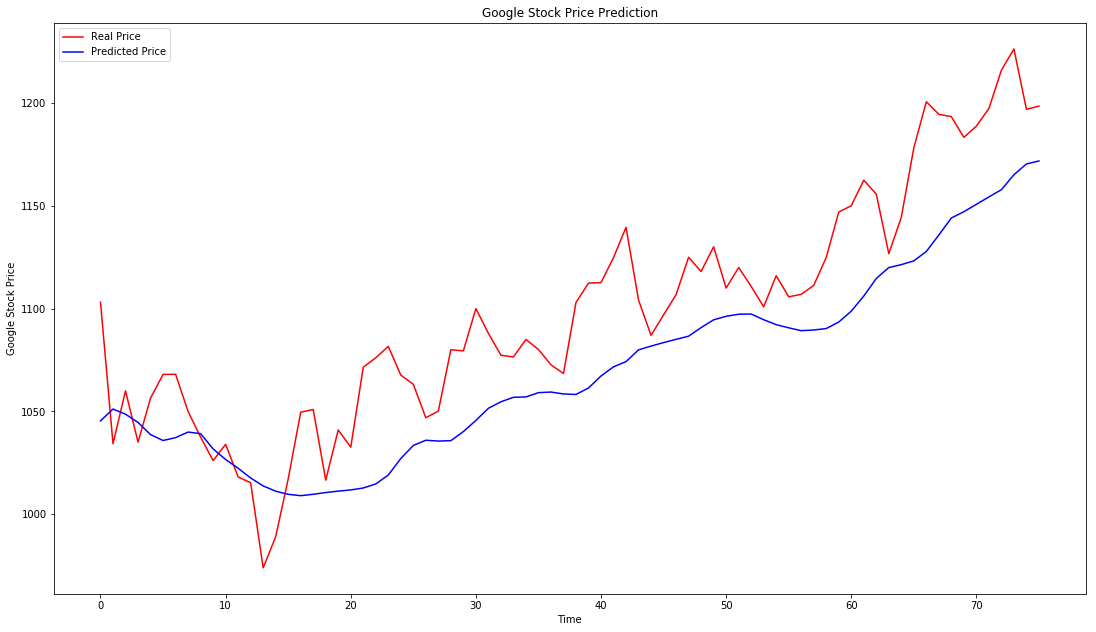

In [6]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [10]:
timestep,hidden1,hidden2 = (50,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/100
554/554 [==============================] - 3s 5ms/step - loss: 0.1692
Epoch 2/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0371
Epoch 3/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0213
Epoch 4/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0212
Epoch 5/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0179
Epoch 6/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0183
Epoch 7/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0170
Epoch 8/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0133
Epoch 9/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0134
Epoch 10/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0124
Epoch 11/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0129
Epoch 12/100
554/554 [==============================] - 1s 2ms/step - loss

554/554 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 100/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0040
(101, 50, 2)
(101, 50, 2)
(101, 1)


Layer = 2 :: Timestep =  50  :: Hidden_1 =  30  :: Hidden_2 =  30


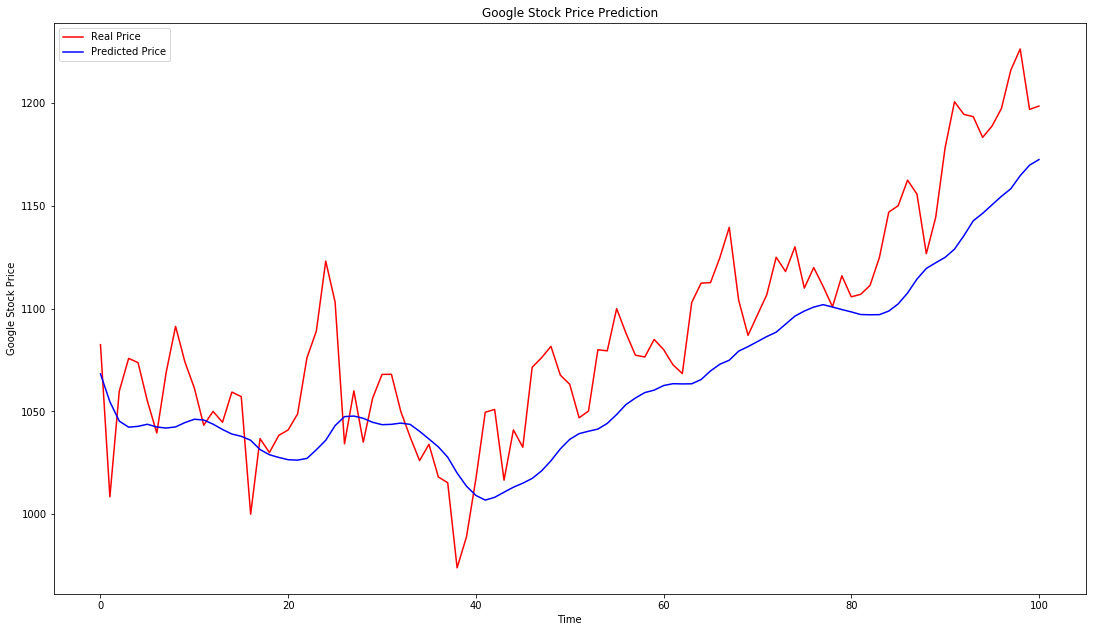

In [11]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [12]:
timestep,hidden1,hidden2 = (75,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/100
529/529 [==============================] - 3s 6ms/step - loss: 0.1216
Epoch 2/100
529/529 [==============================] - 1s 2ms/step - loss: 0.0389
Epoch 3/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0256
Epoch 4/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0187
Epoch 5/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0176
Epoch 6/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0145
Epoch 7/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0136
Epoch 8/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0156
Epoch 9/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0144
Epoch 10/100
529/529 [==============================] - 1s 2ms/step - loss: 0.0142
Epoch 11/100
529/529 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 12/100
529/529 [==============================] - 1s 3ms/step - loss

529/529 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 100/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0033
(76, 75, 2)
(76, 75, 2)
(76, 1)


Layer = 2 :: Timestep =  75  :: Hidden_1 =  30  :: Hidden_2 =  30


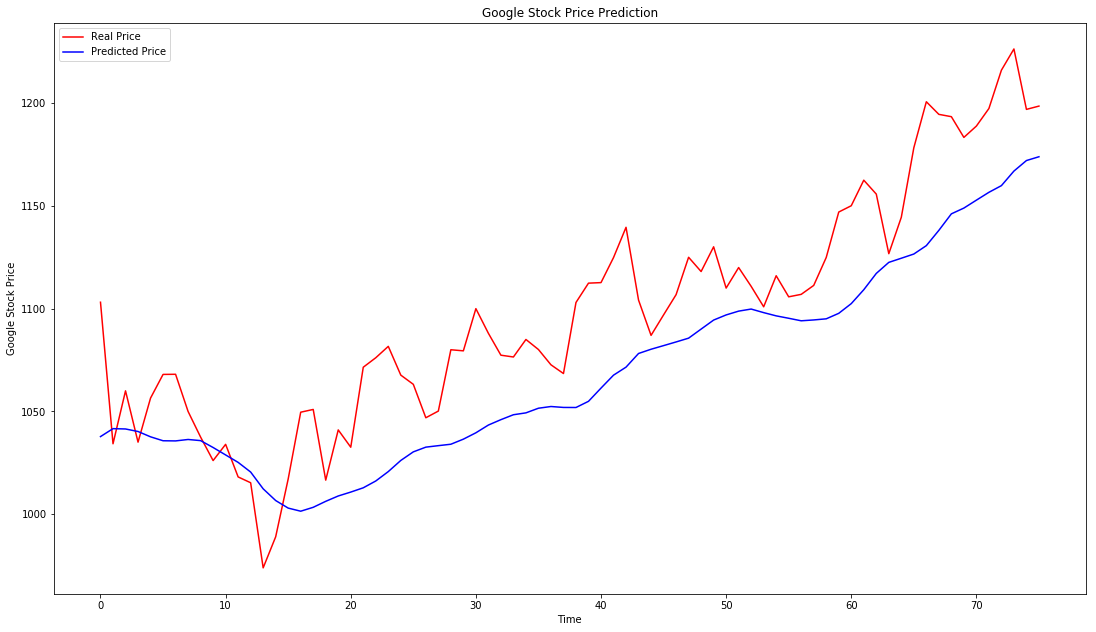

In [13]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [14]:
timestep,hidden1,hidden2 = (20,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/100
584/584 [==============================] - 3s 5ms/step - loss: 0.0597
Epoch 2/100
584/584 [==============================] - 0s 741us/step - loss: 0.0180
Epoch 3/100
584/584 [==============================] - 0s 716us/step - loss: 0.0136
Epoch 4/100
584/584 [==============================] - 0s 663us/step - loss: 0.0119
Epoch 5/100
584/584 [==============================] - 0s 712us/step - loss: 0.0108
Epoch 6/100
584/584 [==============================] - 0s 750us/step - loss: 0.0082
Epoch 7/100
584/584 [==============================] - 0s 685us/step - loss: 0.0101
Epoch 8/100
584/584 [==============================] - 0s 698us/step - loss: 0.0088
Epoch 9/100
584/584 [==============================] - 0s 690us/step - loss: 0.0083
Epoch 10/100
584/584 [==============================] - 0s 696us/step - loss: 0.0078
Epoch 11/100
584/584 [==============================] - 0s 750us/step - loss: 0.0071
Epoch 12/100
584/584 [==============================] 

584/584 [==============================] - 1s 908us/step - loss: 0.0031
Epoch 98/100
584/584 [==============================] - 1s 927us/step - loss: 0.0034
Epoch 99/100
584/584 [==============================] - 1s 905us/step - loss: 0.0032
Epoch 100/100
584/584 [==============================] - 1s 921us/step - loss: 0.0030
(131, 20, 2)
(131, 20, 2)
(131, 1)


Layer = 2 :: Timestep =  20  :: Hidden_1 =  50  :: Hidden_2 =  50


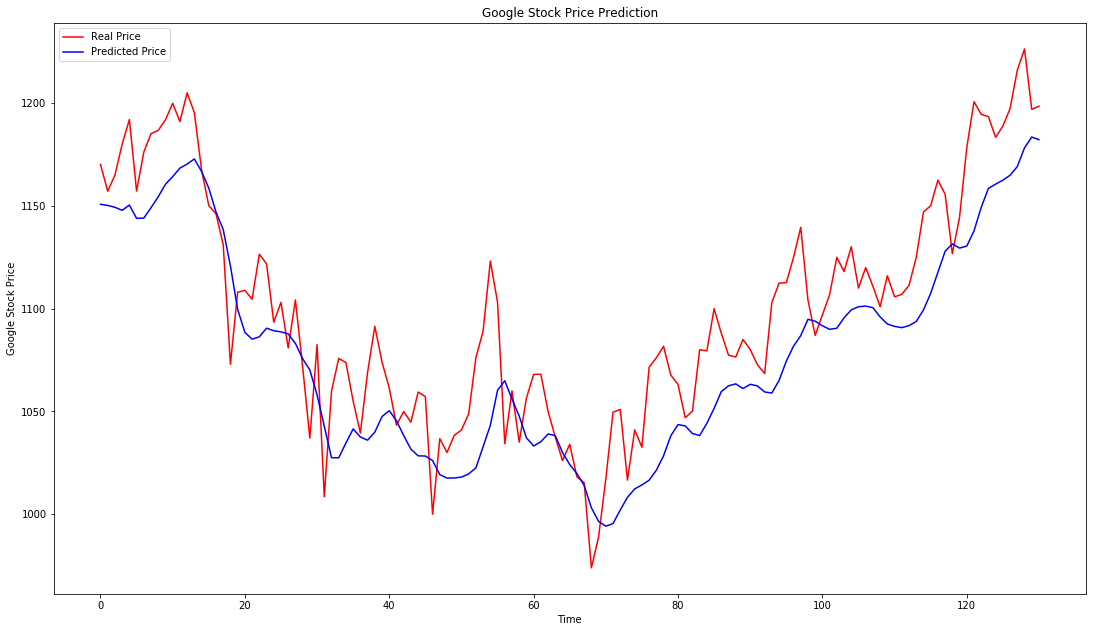

In [15]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [16]:
timestep,hidden1,hidden2 = (50,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/100
554/554 [==============================] - 3s 6ms/step - loss: 0.0559
Epoch 2/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0196
Epoch 3/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 4/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0130
Epoch 5/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 6/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 7/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0116
Epoch 8/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 9/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 10/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0099
Epoch 11/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 12/100
554/554 [==============================] - 1s 2ms/step - loss

554/554 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 100/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0036
(101, 50, 2)
(101, 50, 2)
(101, 1)


Layer = 2 :: Timestep =  50  :: Hidden_1 =  50  :: Hidden_2 =  50


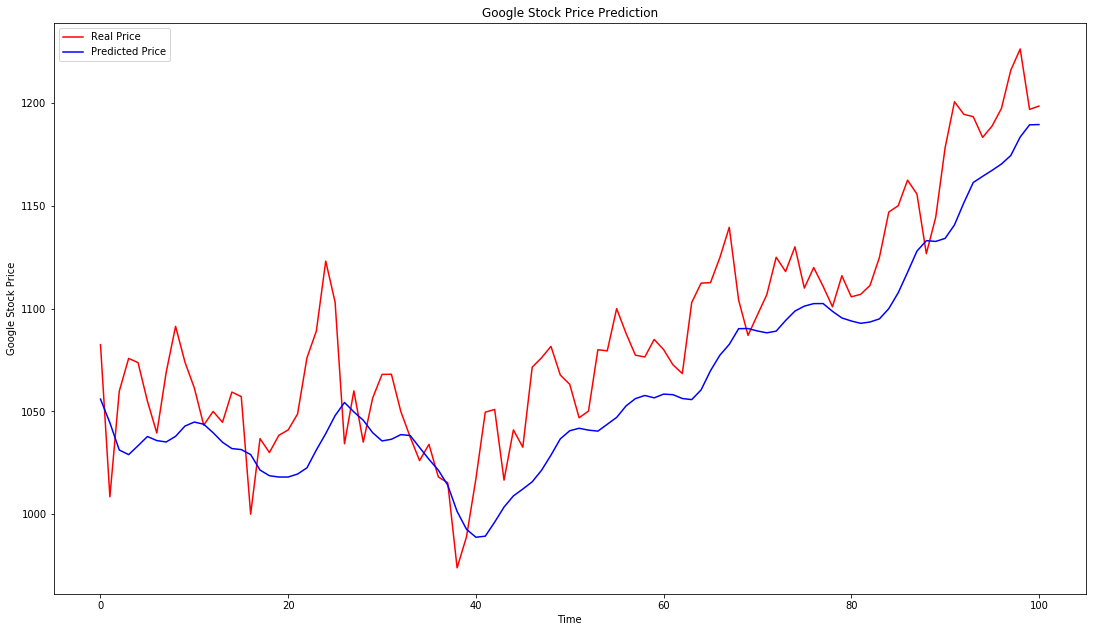

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (75,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/100
529/529 [==============================] - 4s 8ms/step - loss: 0.0834
Epoch 2/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0288
Epoch 3/100
529/529 [==============================] - 1s 3ms/step - loss: 0.0169
Epoch 4/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0170
Epoch 5/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0146
Epoch 6/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0124
Epoch 7/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0122
Epoch 8/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 9/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 10/100
529/529 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 11/100
529/529 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 12/100
529/529 [==============================] - 1s 3ms/step - loss

529/529 [==============================] - 2s 4ms/step - loss: 0.0032
Epoch 100/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0029
(76, 75, 2)
(76, 75, 2)
(76, 1)


Layer = 2 :: Timestep =  75  :: Hidden_1 =  50  :: Hidden_2 =  50


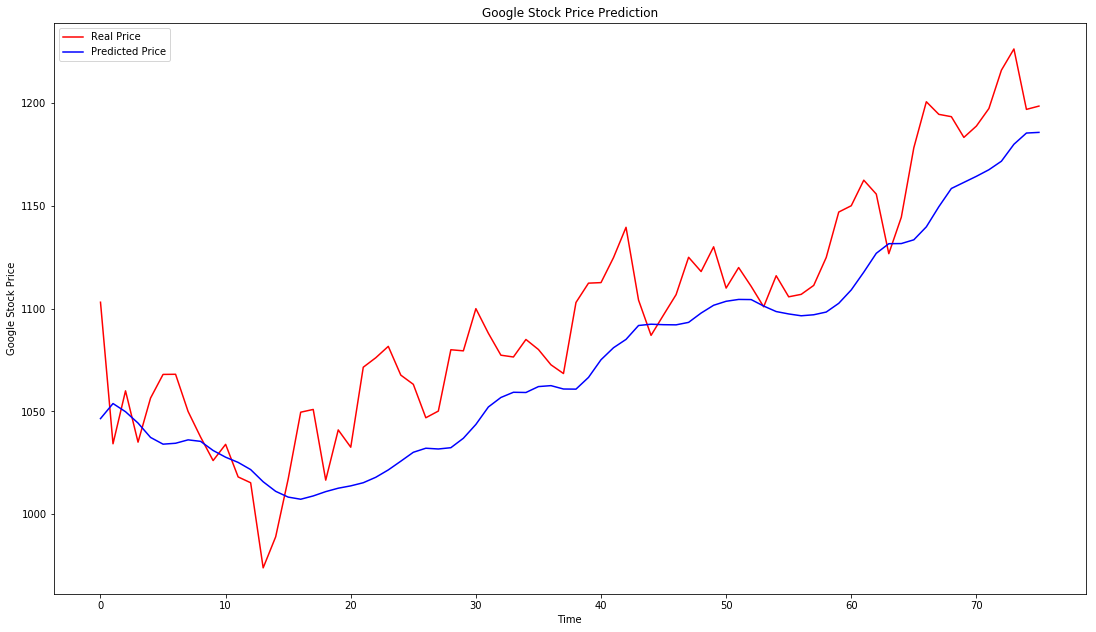

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (20,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/100
584/584 [==============================] - 4s 8ms/step - loss: 0.0559
Epoch 2/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0156
Epoch 3/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 4/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 5/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 7/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 8/100
584/584 [==============================] - 1s 970us/step - loss: 0.0105
Epoch 9/100
584/584 [==============================] - 1s 932us/step - loss: 0.0111
Epoch 10/100
584/584 [==============================] - 1s 933us/step - loss: 0.0103
Epoch 11/100
584/584 [==============================] - 1s 922us/step - loss: 0.0098
Epoch 12/100
584/584 [==============================] - 1s 1ms/ste

584/584 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 100/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0029
(131, 20, 2)
(131, 20, 2)
(131, 1)


Layer = 2 :: Timestep =  20  :: Hidden_1 =  80  :: Hidden_2 =  80


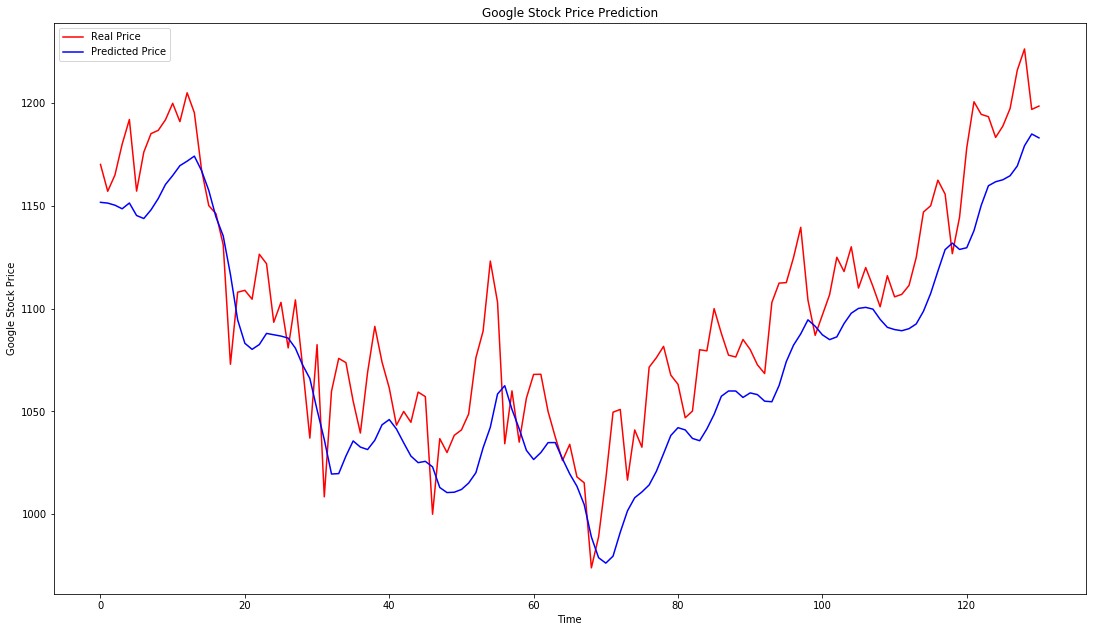

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (50,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/100
554/554 [==============================] - 5s 8ms/step - loss: 0.0891
Epoch 2/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0248
Epoch 3/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0179
Epoch 4/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0150
Epoch 5/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0139
Epoch 6/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0143
Epoch 7/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0113
Epoch 8/100
554/554 [==============================] - 1s 3ms/step - loss: 0.0124
Epoch 9/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0099
Epoch 10/100
554/554 [==============================] - 1s 3ms/step - loss: 0.0098
Epoch 11/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0089
Epoch 12/100
554/554 [==============================] - 2s 3ms/step - loss

554/554 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 100/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0027
(101, 50, 2)
(101, 50, 2)
(101, 1)


Layer = 2 :: Timestep =  50  :: Hidden_1 =  80  :: Hidden_2 =  80


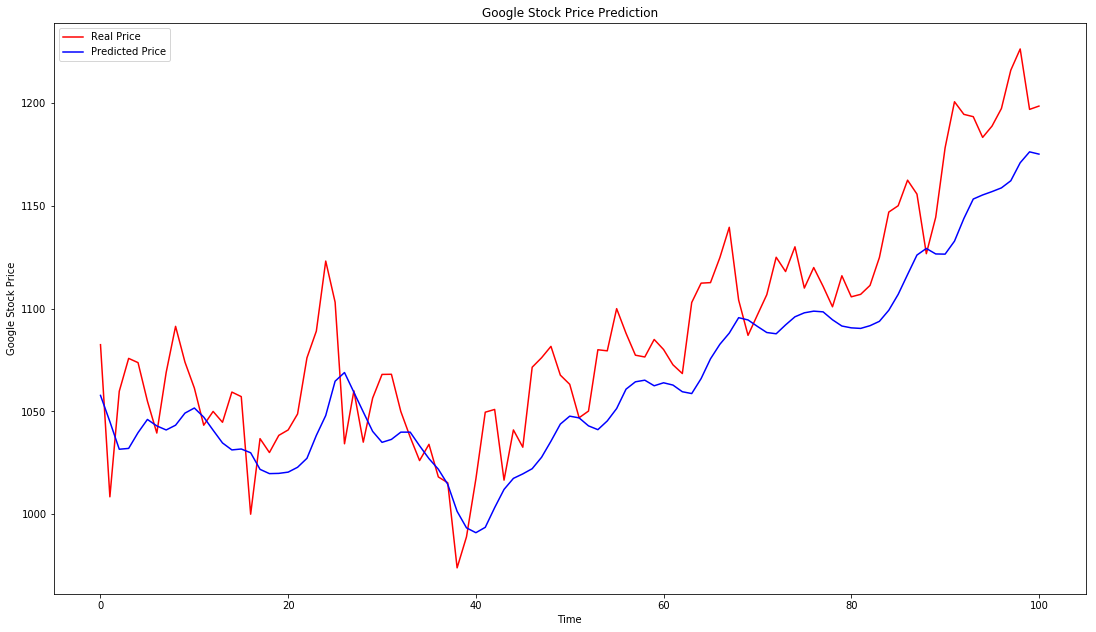

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (75,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0540
Epoch 2/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0156
Epoch 3/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0138
Epoch 4/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0121
Epoch 5/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0129
Epoch 6/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0123
Epoch 7/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0096
Epoch 8/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0107
Epoch 9/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0090
Epoch 10/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0098
Epoch 11/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0096
Epoch 12/100
529/529 [==============================] - 2s 4ms/step - los

529/529 [==============================] - 2s 4ms/step - loss: 0.0027
Epoch 100/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0033
(76, 75, 2)
(76, 75, 2)
(76, 1)


Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


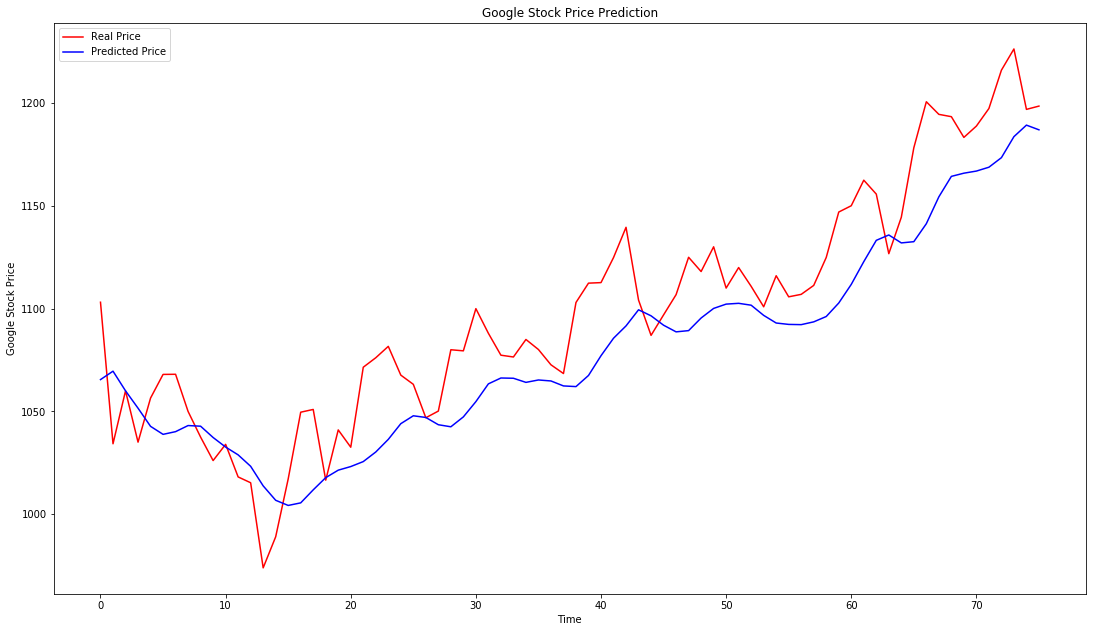

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

<h1>Three Hidden Layers </h1>

------------------------------------------------------------------------------------------------------------

In [10]:
def No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2):
    X_train = []
    y_train = []
    for i in range(timestep, training_set.shape[0]):
        X_train.append(training_set[i-timestep:i])
        y_train.append(Y[i])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 2))
    print(X_train.shape)
    print(test.shape)
    # MODEL ------------------------------------------------------------------

    regressor = Sequential()
    regressor.add(LSTM(units = hidden1, return_sequences=True, input_shape = (X_train.shape[1], 2))) 
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = hidden2, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = hidden2)) 
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=16,activation='relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1,activation='linear'))    

    # -------------------------------------------------------------------------
    regressor.compile(optimizer='adam', loss = 'mean_squared_error')   
    regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)
    
    Yt = dataset_test.iloc[timestep:,2:3].values
    real_stock_price = Yt
    Yt = sc.fit_transform(Yt)
    x_test = []
#     y_test = []
    for i in range(timestep,test.shape[0]):
        x_test.append(test[i-timestep:i])
#         y_test.append(Yt[i])
    x_test = np.array(x_test)
    print(x_test.shape)
    y_test = Yt
#     print(x_test.shape)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],2))
    print(x_test.shape)
    predicted_price = regressor.predict(x_test)
    predicted_price = sc.inverse_transform(predicted_price)
#     real_stock_price = real_stock_price.astype(np.float64, copy=False)
    predicted_price = predicted_price.astype(np.float64,copy=False)
    print(predicted_price.shape)
    return real_stock_price,predicted_price


In [ ]:
timestep,hidden1,hidden2 = (75,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/100
529/529 [==============================] - 8s 14ms/step - loss: 0.1224
Epoch 2/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0360
Epoch 3/100
529/529 [==============================] - 4s 7ms/step - loss: 0.0267
Epoch 4/100
529/529 [==============================] - 3s 7ms/step - loss: 0.0196
Epoch 5/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0194
Epoch 6/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0172
Epoch 7/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0145
Epoch 8/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0151
Epoch 9/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0145
Epoch 10/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0172
Epoch 11/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0144
Epoch 12/100
529/529 [==============================] - 3s 6ms/step - los

529/529 [==============================] - 4s 8ms/step - loss: 0.0039
Epoch 100/100
529/529 [==============================] - 4s 8ms/step - loss: 0.0037
(76, 75, 2)
(76, 75, 2)
(76, 1)


Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


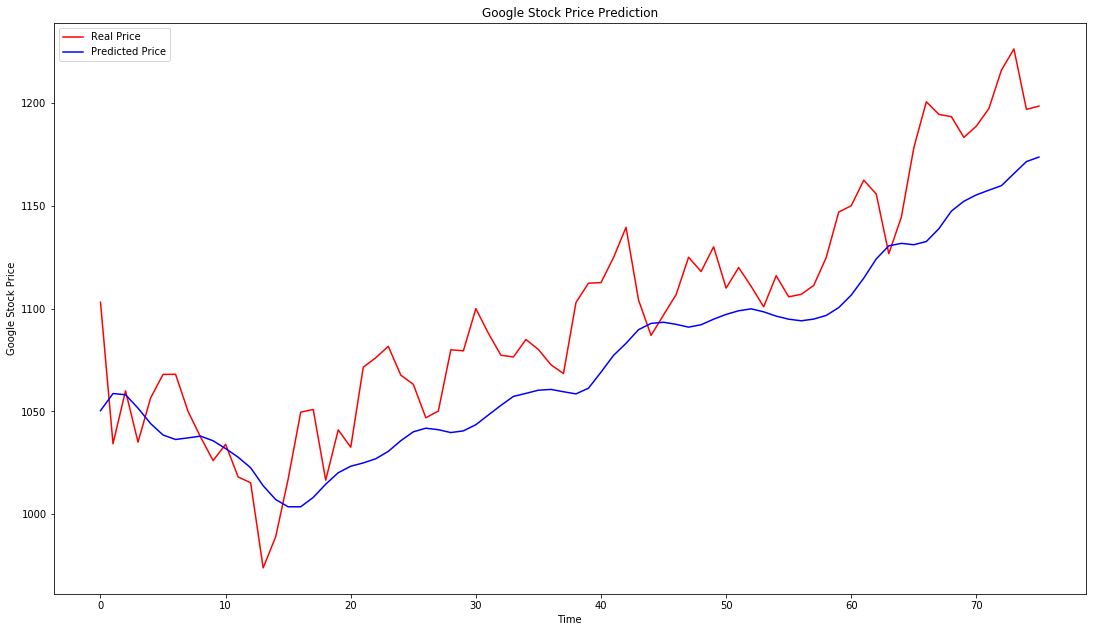

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (20,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/100
584/584 [==============================] - 6s 10ms/step - loss: 0.0919
Epoch 2/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0291
Epoch 3/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0176
Epoch 4/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0138
Epoch 5/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0153
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0168
Epoch 7/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 8/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0150
Epoch 9/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 10/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0132
Epoch 11/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 12/100
584/584 [==============================] - 1s 1ms/step - los

584/584 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 100/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0045
(131, 20, 2)
(131, 20, 2)
(131, 1)


Layer = 2 :: Timestep =  20  :: Hidden_1 =  30  :: Hidden_2 =  30


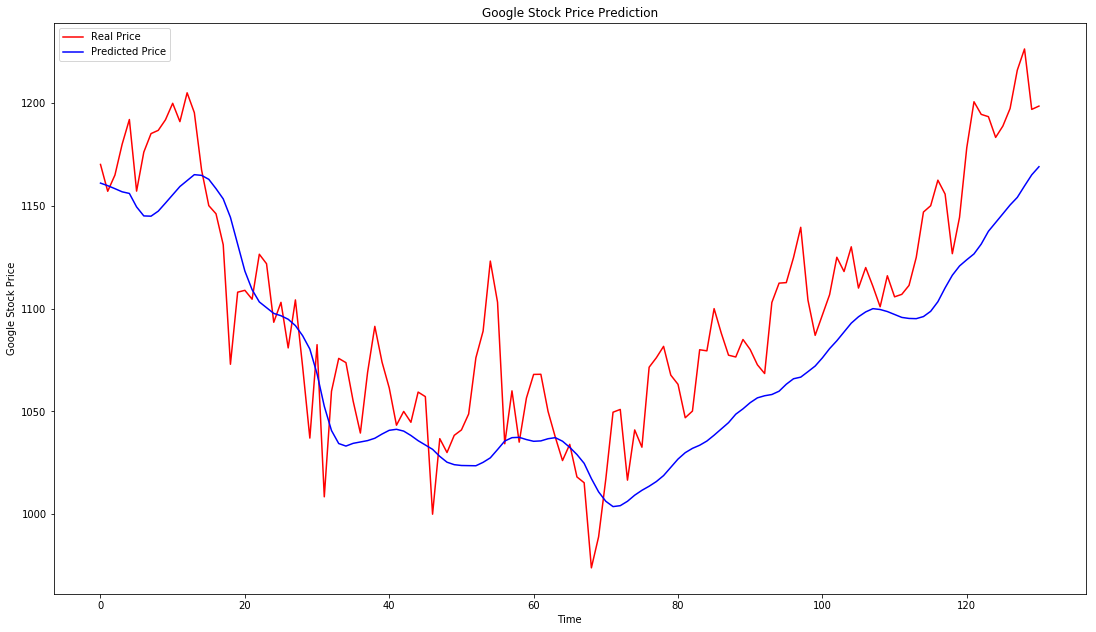

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (50,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/100
554/554 [==============================] - 7s 13ms/step - loss: 0.1051
Epoch 2/100
554/554 [==============================] - 1s 3ms/step - loss: 0.0275
Epoch 3/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0184
Epoch 4/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0155
Epoch 5/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0128
Epoch 6/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0153
Epoch 7/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0141
Epoch 8/100
554/554 [==============================] - 3s 5ms/step - loss: 0.0124
Epoch 9/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0120
Epoch 10/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0094
Epoch 11/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0119
Epoch 12/100
554/554 [==============================] - 2s 4ms/step - los

554/554 [==============================] - 2s 3ms/step - loss: 0.0040
Epoch 100/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0041
(101, 50, 2)
(101, 50, 2)
(101, 1)


Layer = 2 :: Timestep =  50  :: Hidden_1 =  30  :: Hidden_2 =  30


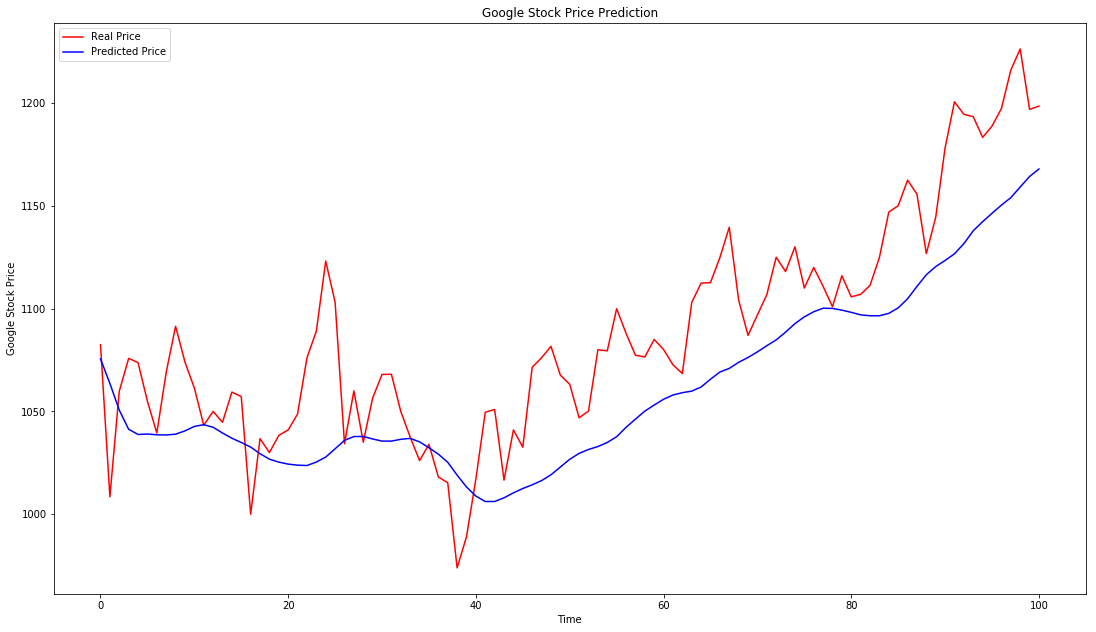

In [ ]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [ ]:
timestep,hidden1,hidden2 = (75,30,30)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/100
529/529 [==============================] - 8s 14ms/step - loss: 0.2073
Epoch 2/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0594
Epoch 3/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0505
Epoch 4/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0335
Epoch 5/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0272
Epoch 6/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0191
Epoch 7/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0192
Epoch 8/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0202
Epoch 9/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0171
Epoch 10/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0149
Epoch 11/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0158
Epoch 12/100
529/529 [==============================] - 2s 4ms/step - los

Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


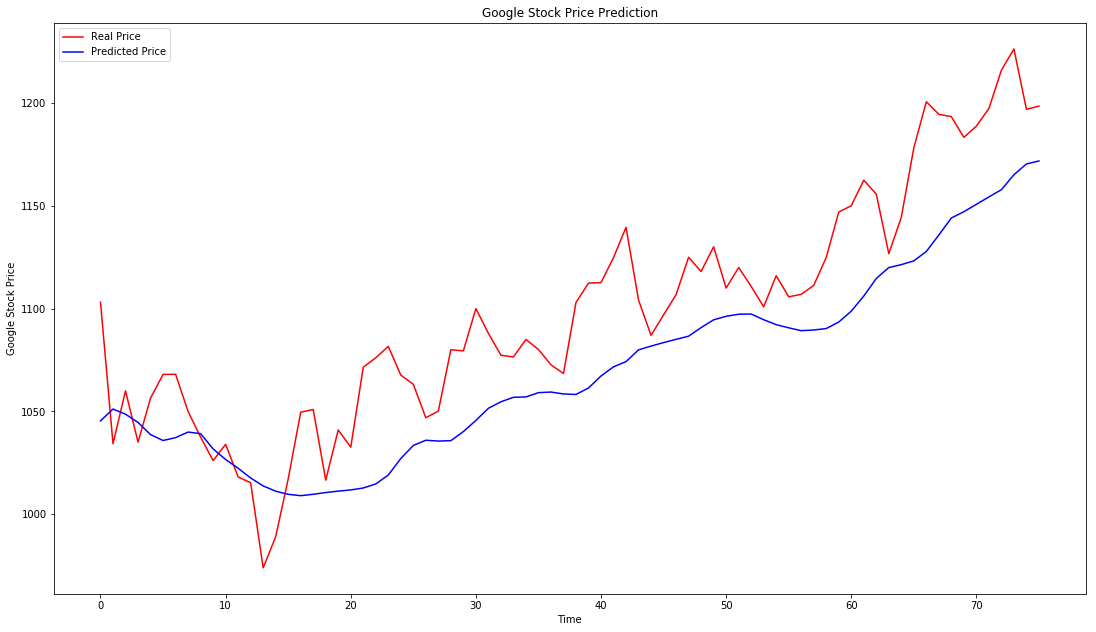

In [7]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [11]:
timestep,hidden1,hidden2 = (20,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0901
Epoch 2/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0256
Epoch 3/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0197
Epoch 4/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 5/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0137
Epoch 6/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0140
Epoch 7/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 8/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 9/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 10/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 11/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 12/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0099
Epo

Layer = 2 :: Timestep =  20  :: Hidden_1 =  50  :: Hidden_2 =  50


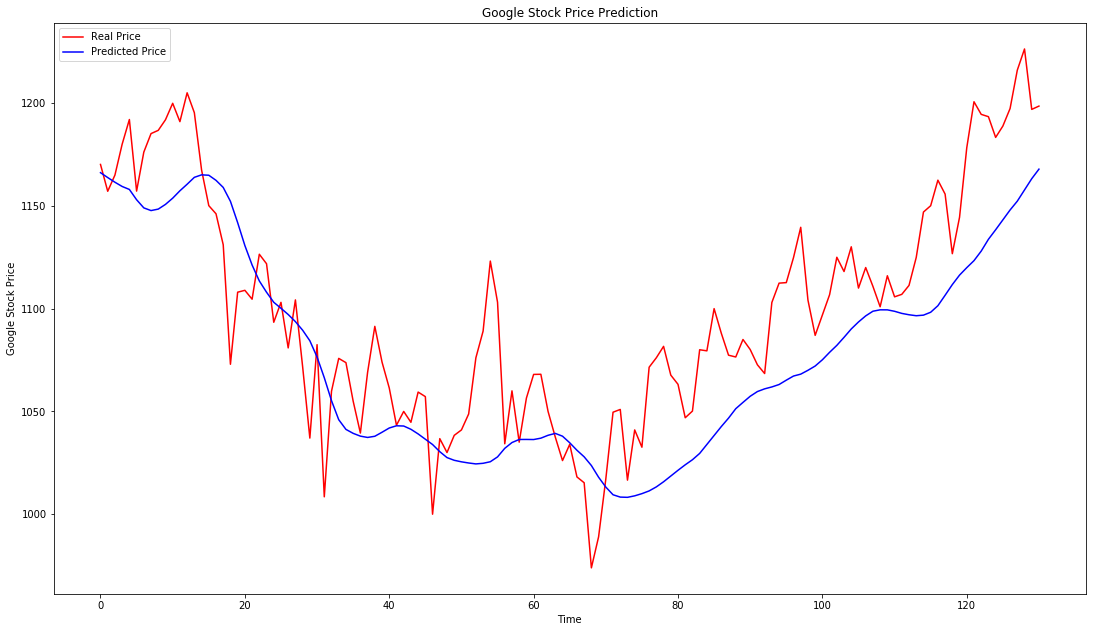

In [12]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [13]:
timestep,hidden1,hidden2 = (50,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/50
554/554 [==============================] - 4s 7ms/step - loss: 0.1123
Epoch 2/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0292
Epoch 3/50
554/554 [==============================] - 1s 3ms/step - loss: 0.0178
Epoch 4/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0171
Epoch 5/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 6/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0182
Epoch 7/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 8/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 9/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0132
Epoch 10/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0131
Epoch 11/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0133
Epoch 12/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0142
Epo

Layer = 2 :: Timestep =  50  :: Hidden_1 =  50  :: Hidden_2 =  50


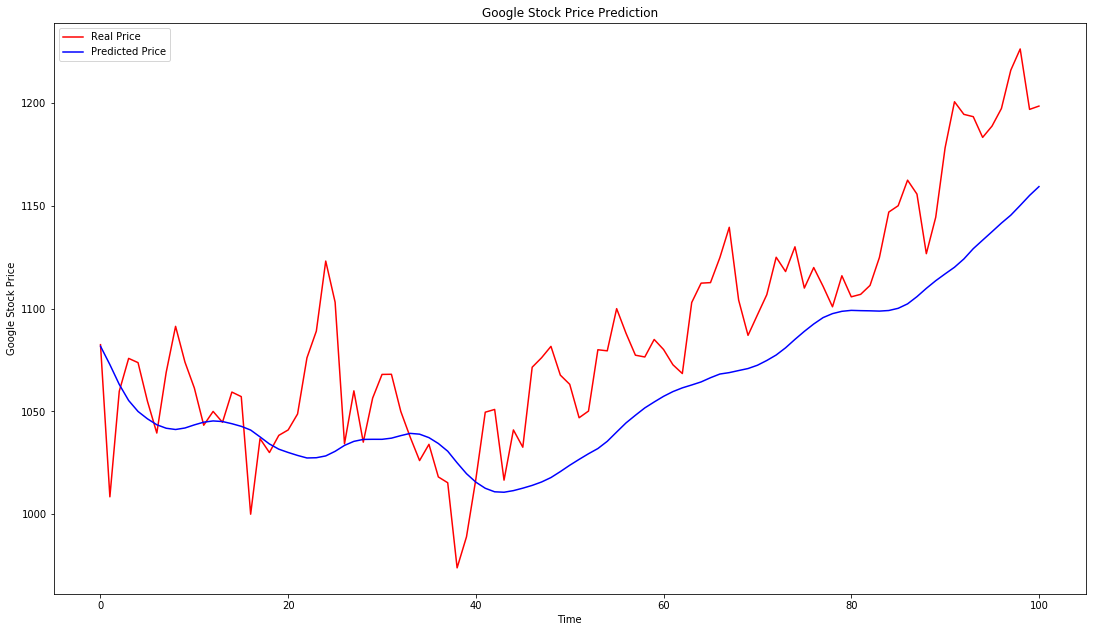

In [14]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [15]:
timestep,hidden1,hidden2 = (75,50,50)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/50
529/529 [==============================] - 7s 14ms/step - loss: 0.1051
Epoch 2/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0317
Epoch 3/50
529/529 [==============================] - 4s 8ms/step - loss: 0.0174
Epoch 4/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0177
Epoch 5/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0169
Epoch 6/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0180
Epoch 7/50
529/529 [==============================] - 2s 4ms/step - loss: 0.0135
Epoch 8/50
529/529 [==============================] - 2s 4ms/step - loss: 0.0139
Epoch 9/50
529/529 [==============================] - 2s 5ms/step - loss: 0.0139
Epoch 10/50
529/529 [==============================] - 2s 5ms/step - loss: 0.0124
Epoch 11/50
529/529 [==============================] - 2s 5ms/step - loss: 0.0115
Epoch 12/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0126
Ep

Layer = 2 :: Timestep =  75  :: Hidden_1 =  50  :: Hidden_2 =  50


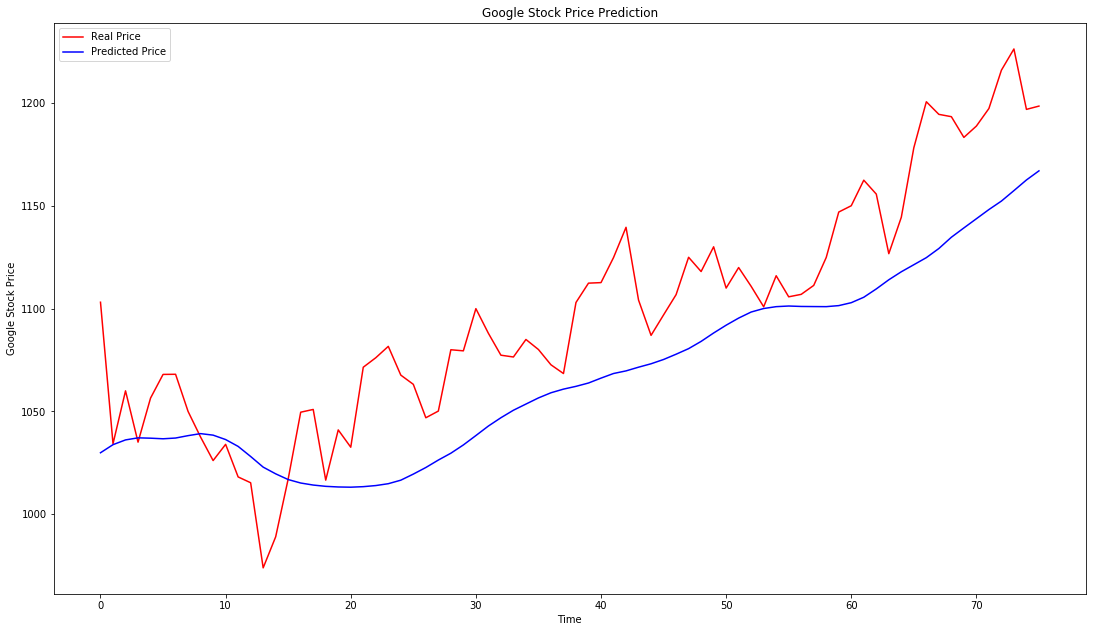

In [16]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [17]:
timestep,hidden1,hidden2 = (20,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(584, 20, 2)
(151, 2)
Epoch 1/50
584/584 [==============================] - 4s 7ms/step - loss: 0.0847
Epoch 2/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0199
Epoch 3/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0167
Epoch 4/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 5/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 6/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 7/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 8/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 9/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 10/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 11/50
584/584 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 12/50
584/584 [==============================] - 1s 2ms/step - loss: 0.0114
Epo

Layer = 2 :: Timestep =  20  :: Hidden_1 =  80  :: Hidden_2 =  80


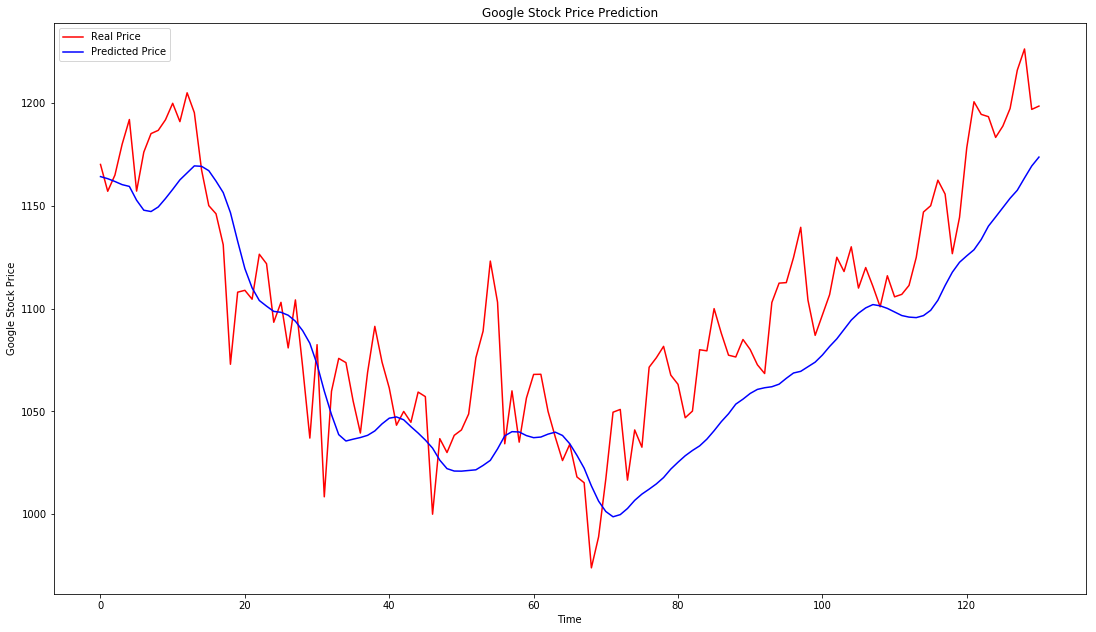

In [18]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [19]:
timestep,hidden1,hidden2 = (50,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(554, 50, 2)
(151, 2)
Epoch 1/50
554/554 [==============================] - 5s 9ms/step - loss: 0.0886
Epoch 2/50
554/554 [==============================] - 1s 3ms/step - loss: 0.0274
Epoch 3/50
554/554 [==============================] - 2s 3ms/step - loss: 0.0204
Epoch 4/50
554/554 [==============================] - 2s 3ms/step - loss: 0.0135
Epoch 5/50
554/554 [==============================] - 2s 4ms/step - loss: 0.0142
Epoch 6/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0154
Epoch 7/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 8/50
554/554 [==============================] - 1s 3ms/step - loss: 0.0143
Epoch 9/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 10/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0138
Epoch 11/50
554/554 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 12/50
554/554 [==============================] - 3s 5ms/step - loss: 0.0137
Epo

Layer = 2 :: Timestep =  50  :: Hidden_1 =  80  :: Hidden_2 =  80


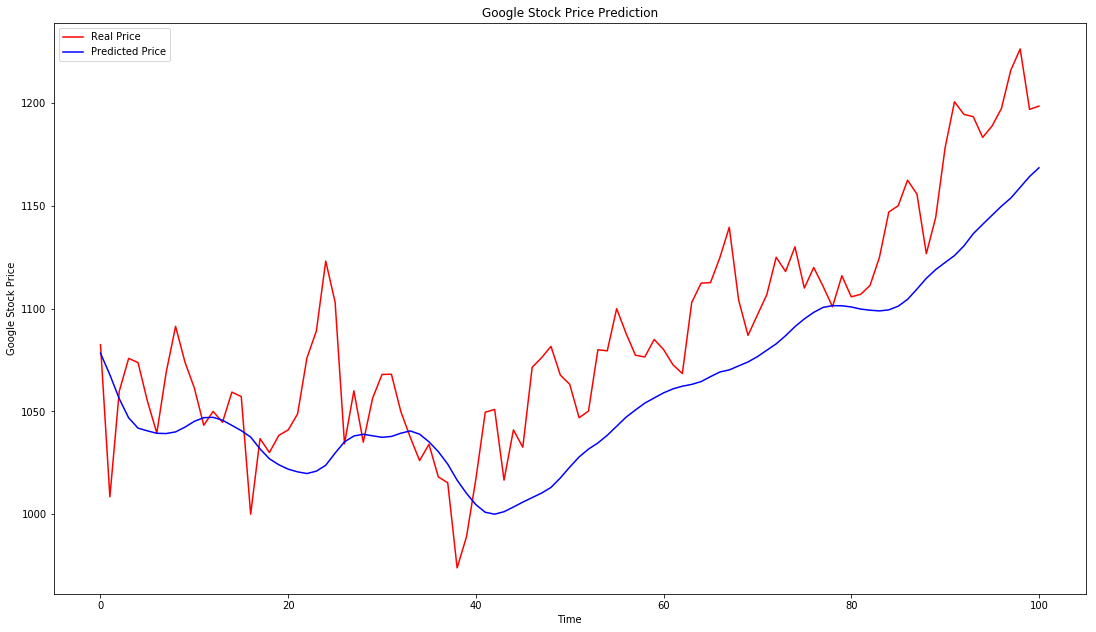

In [20]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))

In [21]:
timestep,hidden1,hidden2 = (75,80,80)
real_stock_price,predicted_price = No_sense_making_us_do_the_same_thing_3(timestep,hidden1,hidden2)

(529, 75, 2)
(151, 2)
Epoch 1/50
529/529 [==============================] - 6s 12ms/step - loss: 0.1176
Epoch 2/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0368
Epoch 3/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0249
Epoch 4/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0257
Epoch 5/50
529/529 [==============================] - 2s 4ms/step - loss: 0.0235
Epoch 6/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0219
Epoch 7/50
529/529 [==============================] - 3s 5ms/step - loss: 0.0177
Epoch 8/50
529/529 [==============================] - 3s 5ms/step - loss: 0.0228
Epoch 9/50
529/529 [==============================] - 4s 7ms/step - loss: 0.0189
Epoch 10/50
529/529 [==============================] - 3s 5ms/step - loss: 0.0195
Epoch 11/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0196
Epoch 12/50
529/529 [==============================] - 3s 6ms/step - loss: 0.0159
Ep

Layer = 2 :: Timestep =  75  :: Hidden_1 =  80  :: Hidden_2 =  80


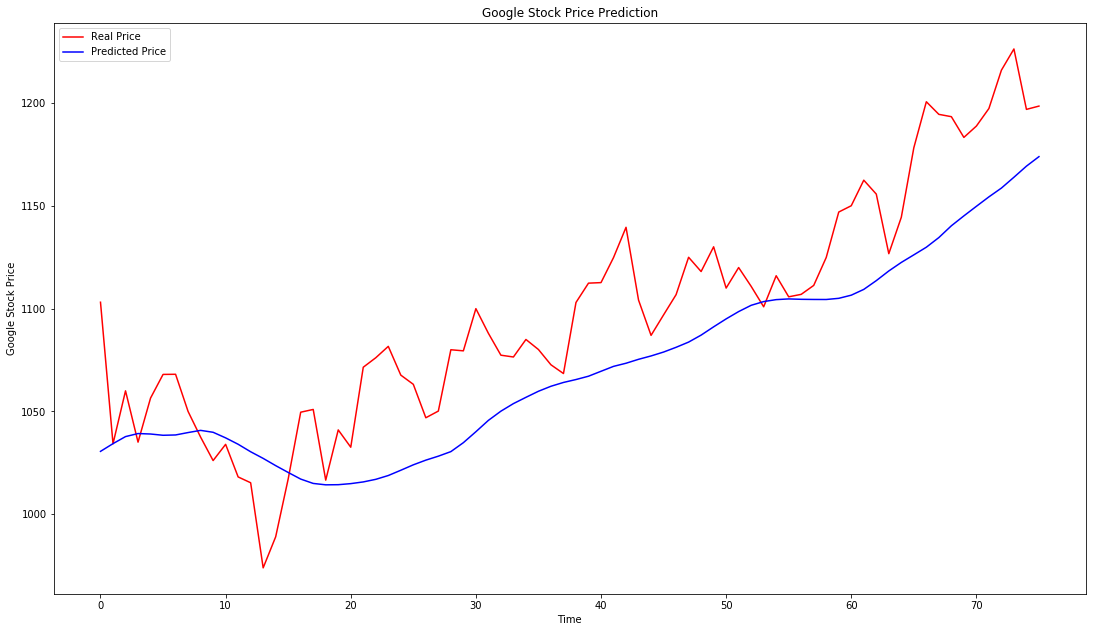

In [22]:
print("Layer = 2 :: Timestep = ",timestep," :: Hidden_1 = ",hidden1," :: Hidden_2 = ",hidden2)
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)# print(math.sqrt(mean_squared_error(real_stock_price, predicted_price)))